In [1]:
import _nb_utils
%load_ext autoreload
%autoreload 2

In [2]:
from config import *
from data import *
from color_map import *

In [3]:
from functools import partial
from torchvision.transforms.functional import to_pil_image

In [4]:
train_ds = SegDataset(image_train_UIDs, resize_size=CONFIG['seg']['image_size'], class_map=CLASS_MAP_VOID)

In [5]:
center_crop_fn = T.CenterCrop(CONFIG['seg']['image_size'])
random_crop_fn = T.RandomCrop(CONFIG['seg']['image_size'])

In [6]:
CONFIG['seg']['image_size']

520

In [ ]:
augment_fn = T.Compose([
    T.RandomHorizontalFlip(p=0.5),
    T.RandomAffine(degrees=0, scale=(0.5, 2)), # Zooms in and out of the image.
    T.RandomAffine(degrees=[-30, 30], translate=[0.2, 0.2], scale=(0.5, 2), shear=15), # Full affine transform.
    # T.RandomPerspective(p=0.5, distortion_scale=0.2) # Shears the image
])

In [162]:
augment_collate_fn = partial(crop_augment_preprocess_batch, crop_fn=center_crop_fn, augment_fn=augment_fn, preprocess_fn=None)

In [163]:
train_dl = DataLoader(
    train_ds,
    batch_size=CONFIG["seg"]["batch_size"],
    shuffle=False,
    generator=torch_gen,
    collate_fn=augment_collate_fn,
)

torch.Size([3, 520, 520])


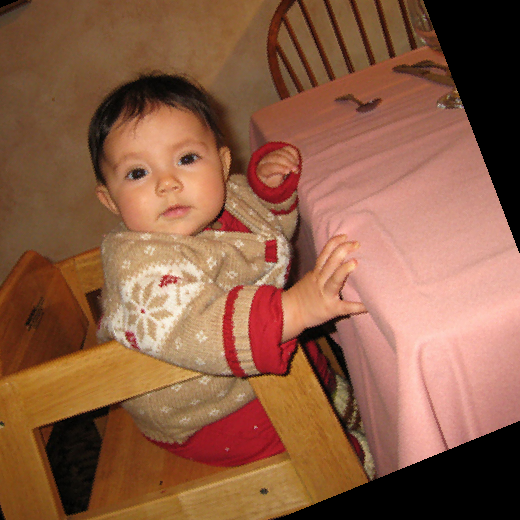

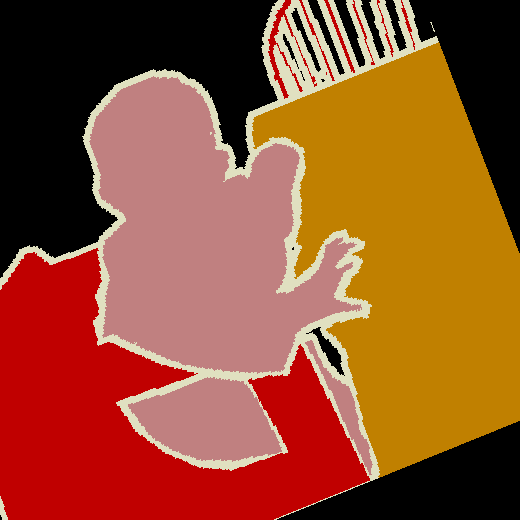

In [170]:
for x, y in train_dl:
    print(x[0].shape)
    display(to_pil_image(x[0]))
    display(to_pil_image(apply_colormap(y[0].unsqueeze(0).to(torch.uint8), color_map=COLOR_MAP_VOID_DICT, num_classes=NUM_CLASSES_VOID)))
    break